In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from import_file import *
load_libs()
set_chinese_font()

# 1. Data Wrangling

In [2]:
data = []
for year in range(2008,2015):
    file = "./data/us/movie_list_%s_v2.json" % year
    with open(file, encoding='utf-8' ) as data_file:    
        data += json.load(data_file)
    
df = pd.DataFrame(data)
df.head()

,detail_url,douban_info,movie_tt_id,name,omdb_info
0,http://www.movieinsider.com/m2401/one-missed-c...,"{'rating': {'max': 10, 'average': 5.8, 'stars'...",tt0479968,One Missed Call,"{'Title': 'One Missed Call', 'Year': '2008', '..."
1,http://www.movieinsider.com/m3221/the-pirates-...,"{'rating': {'max': 10, 'average': 6, 'stars': ...",tt0475998,The Pirates Who Don't Do Anything: A VeggieTal...,{'Title': 'The Pirates Who Don't Do Anything: ...
2,http://www.movieinsider.com/m2828/in-the-name-...,"{'rating': {'max': 10, 'average': 4.6, 'stars'...",tt0460780,In the Name of the King: A Dungeon Siege Tale,{'Title': 'In the Name of the King: A Dungeon ...
3,http://www.movieinsider.com/m3101/first-sunday/,"{'rating': {'max': 10, 'average': 5.9, 'stars'...",tt0486578,First Sunday,"{'Title': 'First Sunday', 'Year': '2008', 'Rat..."
4,http://www.movieinsider.com/m1023/teeth/,"{'rating': {'max': 10, 'average': 5.8, 'stars'...",tt0780622,Teeth,"{'Title': 'Teeth', 'Year': '2007', 'Rated': 'R..."


In [3]:
# Problem, handling unicode json
df.drop('detail_url', 1, inplace=True)
df.drop_duplicates('movie_tt_id', inplace=True)
df['temp_string'] = df['douban_info'].astype(str)
df.drop_duplicates('temp_string', inplace=True)
df['temp_string'] = df['omdb_info'].astype(str)
df.drop_duplicates('temp_string', inplace=True)
df = df.dropna()
df.drop('temp_string', 1, inplace=True)

In [4]:
df['omdb_info'][0]

{'Actors': 'Shannyn Sossamon, Edward Burns, Ana Claudia Talancón, Ray Wise',
 'Awards': '2 nominations.',
 'Country': 'Japan, USA, Germany',
 'Director': 'Eric Valette',
 'Genre': 'Horror, Mystery',
 'Language': 'English',
 'Metascore': '24',
 'Plot': 'Several people start receiving voice-mails from their future selves - messages which include the date, time, and some of the details of their deaths.',
 'Poster': 'http://ia.media-imdb.com/images/M/MV5BMjA2NTk0OTcyMV5BMl5BanBnXkFtZTcwMzk1MDU1MQ@@._V1_SX300.jpg',
 'Rated': 'PG-13',
 'Released': '4 Jan 2008',
 'Response': 'True',
 'Runtime': '87 min',
 'Title': 'One Missed Call',
 'Type': 'movie',
 'Writer': 'Andrew Klavan (screenplay), Yasushi Akimoto (novel), Minako Daira (screenplay)',
 'Year': '2008',
 'imdbID': 'tt0479968',
 'imdbRating': '3.9',
 'imdbVotes': '24943'}

In [5]:
df['douban_info'][1]

{'aka': ['蔬菜海盗历险记', '无所事事的海盗'],
 'alt': 'https://movie.douban.com/subject/1939774/',
 'casts': [{'alt': None, 'avatars': None, 'id': None, 'name': 'Phil Vischer'},
  {'alt': None, 'avatars': None, 'id': None, 'name': 'Mike Nawrocki'},
  {'alt': 'https://movie.douban.com/celebrity/1076005/',
   'avatars': {'large': 'http://img6.douban.com/f/movie/63acc16ca6309ef191f0378faf793d1096a3e606/pics/movie/celebrity-default-large.png',
    'medium': 'http://img6.douban.com/f/movie/8dd0c794499fe925ae2ae89ee30cd225750457b4/pics/movie/celebrity-default-medium.png',
    'small': 'http://img6.douban.com/f/movie/ca527386eb8c4e325611e22dfcb04cc116d6b423/pics/movie/celebrity-default-small.png'},
   'id': '1076005',
   'name': 'Cam Clarke'},
  {'alt': None, 'avatars': None, 'id': None, 'name': 'Laura Gerow'}],
 'collect_count': 809,
 'comments_count': 121,
 'countries': ['美国'],
 'current_season': None,
 'directors': [{'alt': None,
   'avatars': None,
   'id': None,
   'name': 'Mike Nawrocki'}],
 'do_coun

In [6]:
# Data problems
# 1.['imdb_info']['imdbRating'] do not exist
# 2.['imdb_rating'] is 'N/A', at id 108, 273
# 3.['imdb_rating'] is '23,421', need to get rid of the comma

df['imdb_rating'] = df['omdb_info'].apply(lambda x: x.get('imdbRating', np.nan))
df['metascore'] = df['omdb_info'].apply(lambda x: x.get('Metascore', np.nan))
df = df.dropna()
df = df[(df.imdb_rating != 'N/A') &(df.metascore != 'N/A')]

df['year']=df['omdb_info'].apply(lambda x: x.get('Year', np.nan))
df['year'] = df['year'].astype(float)
df['imdb_ratings_count'] = df['omdb_info'].apply(lambda x: int(x['imdbVotes'].replace(',', '')))
df['imdb_rating'] = df['imdb_rating'].astype(float)
df['imdb_ratings_count'] = df['imdb_ratings_count'].astype(int)
# df['name'] = df['name'].apply(lambda x: x.encode('ascii','ignore'))
df['metascore'] = df['metascore'].astype(float)
df['metascore'] = df['metascore']/10
df['genre']=df['omdb_info'].apply(lambda x: x.get('Genre', 'none'))
df['country']=df['omdb_info'].apply(lambda x: x.get('Country', 'none'))
# df['genre'] = df['genre_all'].apply(lambda x: x)
# # df['country'] = df['country_all'].apply(lambda x: x.split(',')[0])
# df['country'] = df['country_all'].apply(lambda x: x)

df['name'] = df['douban_info'].apply(lambda x: x['title'])
df['db_rating'] = df['douban_info'].apply(lambda x: x['rating']['average'])
df['db_ratings_count'] = df['douban_info'].apply(lambda x: x['ratings_count'])
df['image_url']=df['douban_info'].apply(lambda x: x['images']['large'])
df['douban_url']=df['douban_info'].apply(lambda x: x['alt'])
df['douban_year']=df['douban_info'].apply(lambda x: x['year'])
df['genre_douban']=df['douban_info'].apply(lambda x: x['genres'])
df['country_douban']=df['douban_info'].apply(lambda x: x['countries'])

df.drop('douban_info', 1, inplace=True)
df.drop('omdb_info', 1, inplace=True)

In [7]:
df['year'].value_counts()

2011.0    428
2012.0    406
2010.0    384
2009.0    350
2013.0    348
2008.0    288
2014.0    210
2007.0     58
2006.0     10
2004.0      4
1999.0      2
1994.0      2
1987.0      1
2001.0      1
1995.0      1
1993.0      1
1981.0      1
2003.0      1
1978.0      1
1992.0      1
1982.0      1
1954.0      1
1962.0      1
1939.0      1
Name: year, dtype: int64

# 2. Movie Overview

In [8]:
df.describe()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count
count,2502.000000,2502.000000,2502.000000,2.502000e+03,2502.000000,2502.000000
mean,6.374221,5.441647,2010.620703,5.662486e+04,6.085651,20699.289768
std,0.993491,1.721034,3.179870,1.093372e+05,2.324885,50322.771295
min,1.600000,0.100000,1939.000000,1.200000e+01,0.000000,0.000000
25%,5.800000,4.200000,2009.000000,2.821000e+03,5.900000,235.000000
50%,6.450000,5.500000,2011.000000,1.350950e+04,6.700000,2592.500000
75%,7.100000,6.700000,2012.000000,6.073825e+04,7.500000,14463.750000
max,9.000000,10.000000,2014.000000,1.451699e+06,9.500000,586362.000000


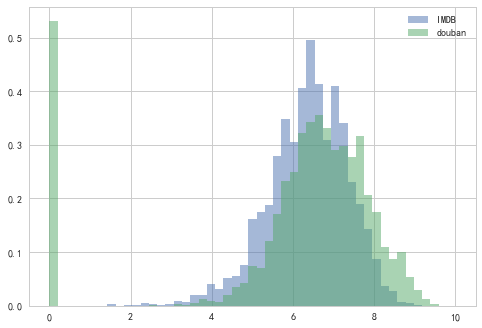

In [9]:
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins, alpha=0.5,  normed=True, label = 'douban')
plt.legend()

可以发现，有的电影豆瓣电影没有分数。应该把这些去掉

（可以看看这些电影是什么样的）

## 2.1 Empty Score Moives

In [10]:
empty_df = df.query('db_rating == 0')
display(empty_df.describe())
fig=plt.figure()
empty_df['imdb_rating'].hist(bins=arange(-0.05,10,0.1), alpha=0.5)
plt_configure(title='No Douban rating, IMDB Rating Distribution',figsize=(3,2))
fig=plt.figure()
empty_df['imdb_ratings_count'].hist(bins=50)
plt_configure(title='No Douban rating, IMDB Rating Count Distribution', figsize=(3,2))
align_figures()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count
count,271.000000,271.000000,271.000000,271.000000,271.0,271.000000
mean,6.054613,5.182288,2010.874539,705.239852,0.0,7.276753
std,1.127225,1.639032,2.270368,1188.621142,0.0,6.237356
min,2.300000,0.900000,1987.000000,12.000000,0.0,0.000000
25%,5.400000,4.000000,2010.000000,182.000000,0.0,2.000000
50%,6.200000,5.300000,2011.000000,422.000000,0.0,5.000000
75%,6.900000,6.450000,2012.000000,761.000000,0.0,12.000000
max,8.400000,8.600000,2014.000000,13492.000000,0.0,23.000000


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAATsAAACYCAYAAACbI04zAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF5hJREFUeJzt3XlcFOf9B/APoIsiQuMBKhBbk7AgKKcNAsWKeKCgRlMQ
FK8o8WhNlABKU0wJhiTNK5KqhGgCbfAgtiLEg2pMNAYbFTY1RAzghcpRQU3wQrn294fd+bHAsgMu
LDKf918w8+wz33129rMzszOzBkqlUgkioh7OUN8FEBF1BYYdEUkCw46IJIFhR0SSwLAjIklg2BGR
JLQZdps2bYKjoyOqqqqEaXK5HBkZGY+10LCwMMjlcowaNQoBAQHYsWPHY/UHAKWlpZDL5Y/dT3cS
Fhb22GOtS3K5HHl5ecL/p06dglwuxxtvvAEAaGxshIuLC3x9fQEAvr6+kMvlcHJywqxZs3Dw4EHh
sWvXroVcLhfmh4SEoLCwUGsNqmXK5XKMHDkSkydPRnp6us6e46ZNm7B27Vqd9aeJan2Vy+Vwd3fH
kiVLcO7cuRbt1q5di02bNnV6PU35+vri1KlTatPkcjlKS0s7ZXkZGRkICwvrlL6b0rplV1dXh127
dul8wcuWLcPBgwcxa9YsJCQkICUlRefL6O60vbGSk5MREBDQhRV1TFFREQDg6tWruH//vtq8uLg4
ZGRkwMvLC2vWrMGhQ4eEeTNmzEBubi6+/PJLODo6YtWqVaKWZ2RkhNzcXBw7dgxLly5FXFwcvv32
W1GPPXXqlBDGrQkPD8f69etF9aUL+/fvx9/+9jcYGRlh7ty5LQJl/fr1CA8Pb3e/rQWWWJ9//jnc
3Nw69NjWaNsQCQgIQHJyss6Wp4nWsDMyMkJ6ejpqa2t1umBjY2PY2Nhg8eLFWLhwIVJSUsDzm9X1
69cPMplM32W0ycjICMXFxQAehZ6RkZHa/D59+uCZZ55BREQE/P398fHHHwvzevfuDTMzMwwaNAhB
QUG4cuUKqqurRS3XzMwMFhYWePHFF+Ht7Y0TJ07o5PkYGxujb9++OulLjP79+8PR0RGbN2+GmZlZ
iw2Lvn37wtjYuMvqAQBTU1P06tWry5Ynk8nQr1+/Tl+O1rBzdnaGgYEBDhw40GJeVVUVfv/738Pd
3R2BgYHIycnpUBE+Pj6oqqoSPtXy8/MRFBQEV1dXLFq0CFevXgXQ+idE8129rVu3ws3NDVOmTFGr
p6amBlFRUXB3d4enpyc2b96s1seOHTsQEREBZ2dnTJ8+HSUlJaJqV+1mHDhwANOmTUNiYqIwr6Sk
BGFhYXB2dsbEiRPx5ZdfAgB27doFuVyOzZs3Y+/evZDL5Xj++edb9N3abqy2Wrdv3w4PDw9MnDgR
7777Lry8vHD69GlRz6UjhgwZAhMTE5SVlaG4uBhOTk4a2/r4+ODcuXMtPjgbGxuRnZ0NKysrmJmZ
tbuGPn364MGDBwA0v84XL16EXC7H/PnzUVZWJuxCqoJapbWtbdW0jz76CL/+9a/h7e2NI0eOCPPz
8vIwadIkPP/880hISMDUqVORlJTUrufQu3dveHp64syZM2rTNe3GpqWlYdy4cXB2dsbixYtRWVkJ
AAgKCoJcLkdZWRnmz58PuVyOd955p8Vz+fe//43Zs2cjOjq6Rd+atgozMzPh4eGB8ePHIysrS5je
fD1V7ZY+fPgQcrkcEyZMAABhzI8eParWr6bdWG05kJ+fj8DAQLi4uGDdunVaN5a0hp1MJkNISAg+
/fRTtemNjY1YsWIFZDIZMjMzsWjRIixfvhznz5/X1mULgwcPBgDcvHkTlZWVWLRoEaZMmYJ9+/Zh
xIgRWLx4MR4+fCiqL4VCgczMTPzud7/DqlWrcOvWLQDAhx9+iLNnzyIjIwOpqanYuXMn8vPzhccl
JSVBLpdj//79MDMzw4cffii6/hMnTuDjjz/GK6+8gtmzZwvT165dCwsLCxw+fBhRUVGIiopCfX09
Zs+ejdzcXCxduhQBAQHCrpxYmmq9fPky3n//fXzyySd4+eWX8fnnn2Pv3r1wdHQU3XdHjBw5EkVF
RSgqKsLIkSM1ths8eDDq6+uFrbesrCy4u7vD2dkZKSkpSExMhIGBQbuWXVBQgJycHLi6ugLQ/Dr/
6le/Qm5uLpKTkzF06FDk5uYiNzcXzz77rKjlHD9+HD/++CP27NmDwMBAbNiwAQCgVCrx2muvITw8
HCkpKdi9ezfi4+MREhLSrucBPBqfmzdvam136dIlxMfHIy4uDvv27YNMJhPCNTU1Fbm5uRg6dCiS
k5ORm5uLV199Ve3x58+fx5tvvomFCxdi6dKlous7evQo0tPTsWbNGsTExODChQtttjc2NkZubq4Q
jKox/81vfqN1WWJyYP369YiNjcW2bduwf/9+rbvtor6NDQ0NxcWLF9UOTv/www/48ccfERcXB2tr
a8yaNQu//e1v8dlnn4npUo1qBVcqlcjMzMQzzzyDxYsXw8rKCuvWrUNNTQ2+/vprUX1FRUXBxsYG
L730EszNzXH8+HEAwJIlS/CPf/wDxsbGuHTpEgwNDXHp0iXhcaNHj0Z4eDisra0RGBiI8vJy0fWX
lJQgNTUVkyZNgo2NjTB9y5YteOutt3Dnzh1UVFTg7t27qKqqgkwmg5mZGYyNjYVdOVNTU9HL01Rr
YWEhnnvuOTg4OGD69OmoqqqCgYEBTExMRPfdEfb29kLY2dvba2zX9HUGgIkTJyIzMxPp6enw9vZG
ZGQkampqtC6voaEB7u7ucHFxQVBQEIKDg+Hv7w9A8+tsaGgIMzMzmJiYCH+bmZnB0FDcCQkGBgZ4
++23YWNjg6CgIGHMf/rpJ1RUVGD69OlwcHCAra0tKioq8NRTT4nqt/kyxBzKkclkMDAwQF1dHSwt
LbFlyxb88Y9/BPDo0IfqeZmYmAjrWVNFRUVITk5GYGCg6LAHgFWrVuGXv/wlAgMD4ezsrHb8VZOm
67ZqzMXsIovJgRUrVmDMmDFwd3eHg4MDKioq2uxT1Cs9YMAABAYGqm3dlZWVYcCAAWpv0uHDh6Os
rExMl2pu3LgBABg0aBDKy8vx9NNPC/N69eoFKysrjeHT/M3RNGyGDh0qbN4XFxcjODgYwcHByM7O
hrGxMRobG4W2Y8eOFf7u3bt3u+p/4YUX8Itf/KLF9EOHDmHChAlYtWqVsMXb0NDQrr5bo6nWp59+
GiUlJbh16xYUCgWeeuopDBo06LGXp42DgwPOnDmD27dvq41/c1VVVejVq5cwViYmJrC2tsbIkSMR
FxeHkpISUcfejIyMkJmZiQ0bNsDQ0BALFiwQglTb69xRLi4u6NOnDwD1MTc3N4e5uTkUCgVu3bqF
kpKSdgVIU1VVVcJeTlusra3x9ttvY9u2bRg7diyWLVsm7OKJ4evri+HDh7e7vqav7bBhw4T3VnNi
PrC0EZMDzd8Hj70bq7JgwQK1XS1ra2vcunULd+/eFaZdvXoVVlZWYrsUfPPNN7C0tIS1tTWsrKxw
7do1YV59fT3KysowbNgwYYVWBca9e/fUts4AqA1GZWWlsPJER0fjxRdfxLFjx/DXv/61xSdve7as
mmtty6m0tBRxcXHYtm0bDhw4gJiYmBZtxH6SN6ep1gEDBqBfv37w8fHBihUrEB8f3+7dwo6wt7fH
sWPHYGtr22a7nJwcjBo1qs0vXcR+GFhbW2Pq1KlwcXHBli1bhOnaXmdDQ0OdjnlDQwPs7e2xfPly
+Pj4YM6cOR06Baq+vh4nT54U9S3o9evXYWtri88++wwnTpzAwIEDW3yD3Na61dEt/aZbTk3fW4D6
63b27Fm1x6m2ntsz7m3lgEp737Oiw87W1lbtILqjoyPs7e0RGxuL0tJSZGRk4OjRowgODhbV38OH
D3Ht2jX8/e9

In [11]:
empty_df.sort_values(by='imdb_ratings_count',ascending=False).head()

,movie_tt_id,name,imdb_rating,metascore,year,imdb_ratings_count,genre,country,db_rating,db_ratings_count,image_url,douban_url,douban_year,genre_douban,country_douban
1964,tt1520498,气球大冒险,7.2,3.2,2012.0,13492,"Adventure, Family",USA,0.0,0,http://img3.douban.com/lpic/s9066428.jpg,http://movie.douban.com/subject/4067243/,2012,[家庭],[美国]
2935,tt2967006,意大利之旅,6.7,7.5,2014.0,8567,"Comedy, Drama",UK,0.0,11,http://img3.douban.com/view/movie_poster_cover...,http://movie.douban.com/subject/25864254/,2014,"[剧情, 喜剧]","[英国, 意大利]"
285,tt0886539,偶然运气,7.1,5.8,2009.0,6528,Drama,India,0.0,22,http://img6.douban.com/lpic/s3830167.jpg,https://movie.douban.com/subject/3345508/,2009,[剧情],[印度]
227,tt0479162,特殊病人,7.0,5.7,2006.0,4707,"Comedy, Drama, Sci-Fi",USA,0.0,6,http://img3.doubanio.com/lpic/s3339437.jpg,https://movie.douban.com/subject/3278714/,2006,"[剧情, 奇幻]",[美国]
854,tt1396557,温尼贝戈人,7.2,7.1,2009.0,3564,"Documentary, Biography, Comedy",USA,0.0,12,http://img3.douban.com/lpic/s4396761.jpg,http://movie.douban.com/subject/3794525/,2009,"[纪录片, 喜剧]",[美国]


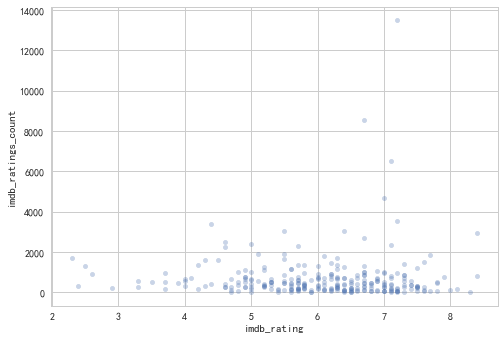

In [12]:
empty_df.plot(kind='scatter', x='imdb_rating', y='imdb_ratings_count', alpha=0.30)

## 2.2 Delete Empty movies, Go ahead

In [13]:
df = df.query('db_rating > 0')

In [45]:
df.query('imdb_rating == 5.9').sort_values(by='imdb_ratings_count',ascending=False)

,movie_tt_id,name,imdb_rating,metascore,year,imdb_ratings_count,genre,country,db_rating,db_ratings_count,...,genre_douban,country_douban,db_rank_norm,imdb_rank_norm,diff,diff_abs,imdb_rank,db_rank,rank_diff,rank_diff_abs
1813,tt1440129,超级战舰,5.9,4.1,2012.0,185836,"Action, Adventure, Sci-Fi",USA,6.6,82519,...,"[动作, 科幻, 冒险]",[美国],-0.223257,-0.529387,0.7,0.7,17.573011,31.470292,13.897281,13.897281
2372,tt1951261,宿醉3,5.9,3.0,2013.0,185769,Comedy,USA,6.4,35624,...,[喜剧],[美国],-0.421817,-0.529387,0.5,0.5,17.573011,23.867069,6.294058,6.294058
2810,tt1959490,诺亚方舟：创世之旅,5.9,6.8,2014.0,177098,"Action, Adventure, Drama",USA,5.7,15042,...,"[动作, 冒险, 灾难]",[美国],-1.116776,-0.529387,-0.2,0.2,17.573011,5.740181,-11.832830,11.832830
2931,tt1291150,忍者神龟：变种时代,5.9,3.1,2014.0,135705,"Action, Adventure, Comedy",USA,6.4,61742,...,"[喜剧, 动作, 科幻]",[美国],-0.421817,-0.529387,0.5,0.5,17.573011,23.867069,6.294058,6.294058
681,tt0814255,波西·杰克逊与神火之盗,5.9,4.7,2010.0,126855,"Adventure, Family, Fantasy","Canada, USA, UK",5.9,34236,...,"[冒险, 奇幻]","[美国, 加拿大]",-0.918216,-0.529387,0.0,0.0,17.573011,9.164149,-8.408862,8.408862
1082,tt0990407,青蜂侠,5.9,3.9,2011.0,126815,"Action, Comedy, Crime",USA,5.7,57034,...,"[喜剧, 动作, 犯罪]",[美国],-1.116776,-0.529387,-0.2,0.2,17.573011,5.740181,-11.832830,11.832830
930,tt1220634,生化危机4：战神再生,5.9,3.7,2010.0,120733,"Action, Adventure, Horror","Germany, France, USA, Canada",6.2,80587,...,"[动作, 科幻, 惊悚]","[德国, 法国, 美国, 加拿大]",-0.620377,-0.529387,0.3,0.3,17.573011,16.868077,-0.704935,0.704935
412,tt1078912,博物馆奇妙夜2,5.9,4.2,2009.0,112057,"Action, Adventure, Comedy","USA, Canada",6.8,90293,...,"[喜剧, 动作, 奇幻]","[美国, 加拿大]",-0.024698,-0.529387,0.9,0.9,17.573011,39.274924,21.701913,21.701913
446,tt0889583,布鲁诺,5.9,5.4,2009.0,109203,Comedy,USA,6.6,12977,...,[喜剧],[美国],-0.223257,-0.529387,0.7,0.7,17.573011,31.470292,13.897281,13.897281
1133,tt0480687,嘿咻卡,5.9,4.5,2011.0,96536,"Comedy, Romance",USA,5.9,6899,...,[喜剧],[美国],-0.918216,-0.529387,0.0,0.0,17.573011,9.164149,-8.408862,8.408862


# 3. Movie Overview (两种评分都有的)

## 3.1 Overall Info

In [14]:
coloumn = df['db_rating']
std, mean = coloumn.std(), coloumn.mean()
df['db_rank_norm']=(coloumn-mean)/std
coloumn = df['imdb_rating']
std, mean = coloumn.std(), coloumn.mean()
df['imdb_rank_norm']=(coloumn-mean)/std

df = df.query('year > 2005')
df.describe()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count,db_rank_norm,imdb_rank_norm
count,2214.000000,2214.000000,2214.000000,2.214000e+03,2214.000000,2214.000000,2214.000000,2214.000000
mean,6.400949,5.453794,2010.773261,6.060259e+04,6.814318,22500.938121,-0.010483,-0.012480
std,0.961540,1.715226,1.948985,1.064255e+05,1.002833,51213.475986,0.995611,0.992171
min,1.600000,0.100000,2006.000000,1.580000e+02,2.600000,20.000000,-4.194451,-4.966372
25%,5.800000,4.200000,2009.000000,4.815500e+03,6.200000,613.500000,-0.620377,-0.632573
50%,6.500000,5.500000,2011.000000,1.838700e+04,6.800000,3673.500000,-0.024698,0.089727
75%,7.100000,6.700000,2012.000000,6.914425e+04,7.500000,17532.000000,0.670261,0.708841
max,9.000000,10.000000,2014.000000,1.451699e+06,9.500000,586362.000000,2.655858,2.669369


In [15]:
df['year'].value_counts()

2011.0    363
2010.0    342
2012.0    337
2009.0    326
2013.0    312
2008.0    274
2014.0    200
2007.0     53
2006.0      7
Name: year, dtype: int64

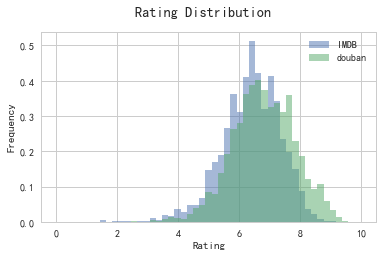

In [16]:
# 1. Why douban is higher?
# 2. Why the std is close to 1? (but IMDB < Douban, indicating a narrower distribution)
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins,alpha=0.5,  normed=True, label = 'douban')
plt_configure(xlabel='Rating',ylabel='Frequency', title='Rating Distribution', legend=True, figsize=(6,3.5))

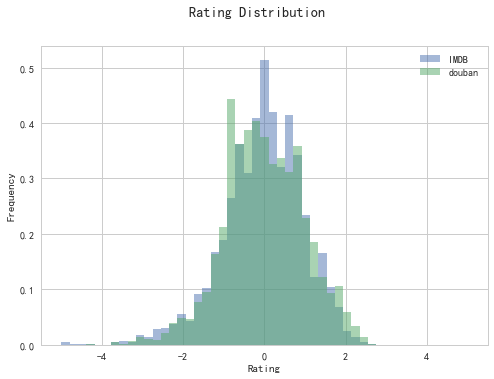

In [17]:
bins=linspace(-5,5)
df['imdb_rank_norm'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rank_norm'].hist(bins=bins,alpha=0.5,  normed=True, label = 'douban')
plt_configure(xlabel='Rating',ylabel='Frequency', title='Rating Distribution', legend=True)

1. 两者大致分布正态分布，可以认为样本量基本足够
2. 这不是标准的正态分布，有偏度。原因？
3. 豆瓣电影偏高（相对有移动了）

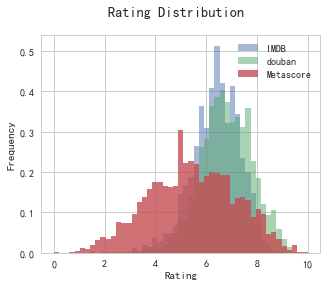

In [18]:
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins,alpha=0.5,  normed=True, label = 'douban')
df['metascore'].hist(bins=bins, alpha=0.8, normed=True, label = 'Metascore')
plt_configure(xlabel='Rating',ylabel='Frequency', title='Rating Distribution', legend=True, figsize=(5,4))

并不是所有的影评分布都会类似. 比如Metascore的分布，就大为不同

Metascore的分数经过了人工的调整、加权，所以分布差别很大

## 3.3 Scatter Comparison

scatter,可以非常直观的比较两者的差别

 
0.7511 x + 1.283


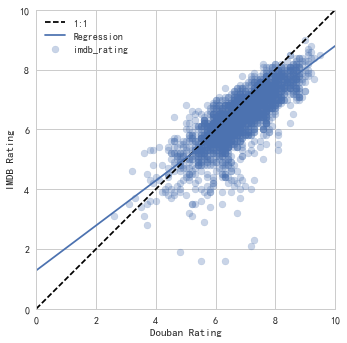

In [19]:
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(df, title='', type='rating')
print(fit_fn)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare_all.html')

对比回归线，可以看到
1. 并不是1:1的关系，斜率不同（原因？可能是打分制？），而且分数越高，差别越大

    - IMDB: 10星制。没有人会打10星  
    - 豆瓣：5星制。4星以上都会打5星
    
    豆瓣的打分制概念简单，不需要太精确，体验更好。

2. IMDB比豆瓣要齐整得多。豆瓣确实有一些电影，偏离回归线较大[(4,6)附近]

3. Play with the scatter, 发现“打分人数”的问题

## 3.4 Rating Number Problem

In [20]:
for min_ratings_number in [0, 1000,3000,5000,10000, 20000,40000]:
    min_ratings_number = min_ratings_number
    temp_df = df.query("(db_ratings_count > @min_ratings_number) & \
                   (imdb_ratings_count > @min_ratings_number)")
    title = 'Min Rating: ' + str(min_ratings_number) + ' N:' + str(len(temp_df))
    fig, fit_params, _ = plot_movie_scatter_comparison(temp_df, title=title, type='rating')
    fig.set_size_inches(2.5,2.5)
    fig.show()
    print(min_ratings_number, fit_params[1], len(temp_df))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


0 0.751111112013 2214
1000 0.780824288134 1528
3000 0.788167598862 1167
5000 0.801933540873 966
10000 0.808246822772 704
20000 0.792454771888 485
40000 0.772679888259 303


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAL0AAADDCAYAAADX/xCBAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsnXl8VNX5/993mTX7RiCJ7BB2ZBPrRkWU4oKIVgXB2rr1
69LiF5XNVq1F1Cr6E62WuhUQbUUE7VfbiloVRQUUEGSRTSCQkHX2O3O33x+TGRPIMoGZJMC8Xy80
mbn3nufefObMc855zvMIpmmaJElyCiG2tQFJkrQ2SdEnOeVIij7JKUdS9ElOOZKiT3LKkRR9klOO
NhP9ggULKC4u5t133wVg48aNFBcXM3PmzHrHjR49mi+//DIubc6cOZPi4mKKi4sZMmQIN9xwA9u3
b4/LtSG+th4PlZWV3HrrrQwZMoQbb7yRysrKmM4rLi7moYceiv6+YMECRo8eHdO5zz33HCNHjqR/
//5MnTqVsrKy6HsfffQRF110Ef369WPs2LGsXbv2qPMfeOABFixY0Oj1N27cSN++fWOypTnavKeP
iK4x8b399tsMGzYsbu1dfvnlrF27ljfffJP09HRuv/12VFWN6dyZM2c2+YeJt63HyrRp09B1nRUr
VlBcXMysWbNiPvett97C6/W2qL133nmHN954g2effZYPPvgAQRCYN28eAPv37+fee+/ltttuY/Xq
1YwePZq77roLXdcBME2TJ598ktdee63R66uqyn333YdhGC2yqzHaVPSSJNUTvSRJRx2TmpqKLMtx
a9NisZCenk737t154IEH2L9/P/v27YvLteNt67Gwbds21q1bxx/+8Ae6dOnCtGnT2LhxIwcPHozp
fEVRWLZsWYvaPHToEI8++ijDhw+nY8eO/PznP+fbb78FYOfOnUybNo0JEyaQnZ3NDTfcQHl5efSb
YNGiRWzZsoULL7yw0eu/8MIL0Q9JPGhT0Q8aNIgdO3YAsGPHDgYPHnzUMQ25DKNHj+Zf//oXN954
I4MHD2by5MlUVVW1uH2bzQaE/9AAmzZt4sorr2Tw4MFcdtllfP311wA8/vjjFBcX89Zbb/HMM89Q
XFzMxIkT42Lr/PnzGTFiBJdffjlz585lxIgRlJSURN+fOXMmc+bMifmetm3bRteuXSkoKADAarXS
p08fNm3aFNP5Y8aMYcmSJY32qg3Zc8sttzBixIjo7zt27KBr164AnH/++Vx33XX13nM6neTl5QHh
5/PXv/6V1NTUBtvbu3cvr7zyCr/73e9isj8W2lT0Xbp0weVy4fV62bFjB/369Yv53Hnz5nHxxRez
cuVKqqurWbJkSYva1nWdl156iczMTLp3745pmtxxxx2MHDmSVatWcfXVV0cf9J133snatWu59NJL
ufnmm1m7di2LFy8+blvXrFnDypUr+fvf/86FF17IunXrePfdd6OCALj//vtb9Af3er2cdtpp9V5L
T0+ntLQ0pvOvvPJKqqur+eijjxp8vzl7qquref3115k8eXKD7z///PNcffXVWCwWAE477TQEQWj0
er///e/5n//5n6Pu6Xho0+9iQRAoLi7mk08+weFwkJmZic/ni+ncCy+8kCuvvDL686FDh2I6b+XK
lfz73/9GURSys7N58skncTgcmKbJm2++SUZGBrt376aiooLdu3cD4W8Em82GxWLBZrORnp7eovts
zNYtW7YwbNgwunfvzsUXX8xf/vKXeoIHcDgcLWpLkqSooCLY7XYCgUBM56ekpPDzn/+cRYsWMXz4
8KPeb86e+++/n9NPP50LLrjgqPcWL17Mvn37+POf/xyTLcuWLUNRFK6//vqY3bNYaFsHFOjXrx9v
v/12i3p5gJ/85CfRny0WC7HGzV144YVMnz6dxx57jGAwyFlnnQWEP4BLly7l9ddfJz8/n969e8dt
4NSYrZ07d2bZsmUEAgHWr19Pr169jrutrKyso2ZrvF4vVqs15mtMmTKFsWPHkpGR0aK2X331VTZs
2MCKFSuOem/z5s3Mnz+fhQsXxnTdyspKnnrqKV5++WVEMb4OSZvP3vTr14+PPvqoxaJvzAdsDqfT
SVFREXfffTefffZZ1G9fu3Ytr7zyCm+99RYrVqzglltuOepcQRBi/nDFYmvnzp2prq5mxIgRzJ8/
Py5+66BBg9i+fTt+vx8Iz4589913dOzYMeZrFBUVccEFF7Bq1aqYz/n88895/PHHWbBgAdnZ2fXe
Ky0t5Y477mDatGn1fP+m+OSTT6iqqmLSpEkMHz6c8ePHAzB8+HDeeeedmO1qiHYh+rr/by06d+7M
1VdfzZNPPgkQnabzeDxs3rw5OlirK/IuXbqwdu1aDh8+zLfffltvLvpY+Mtf/sL111/PypUref/9
9xkyZMhRxwQCgehAOxYKCgro3bs3zz33HBB2ESorK+t928TCDTfc0OCMSUP27Nq1i9tvv5177rmH
nj174vP5om6qoijcfPPNDBs2jKuuuir6XnOzMRdddBH/+c9/WLFiBStWrGDhwoUArFixIua1g8Zo
c9H37NkTq9Xa6qIHuP3229m8eTOfffYZ5557LhdeeCFXX30106dP5/LLL0cURbZs2RI9/rrrrsPp
dDJmzBh+/etfU11dfVztjxs3joULF3LVVVcxbNgwRo4cedR04YMPPlhvwSgWHnzwQVasWMHIkSO5
//77mTFjxlG9b3MMHTqUQYMGNXjtI+35+9//jt/v58EHH2To0KHRfwCrV69mx44d/POf/6z33rp1
65psPyUlhaKioui/yDdVUVERKSkpLbqXIxGSm0jajlGjRkUHfqqq8uKLL7Ju3TqWL19+3Nf2+Xys
X7+eoqIiunfvHgdrTx6Som9DXn75ZZYuXUppaSmSJNGnTx/+93//lzPOOKOtTTupSYo+ySlHm/v0
SZK0NknRJznlSIjoKyoq6i1Dz549m2uvvTbmlbgkSRJJ3EXvcrmYMWNGdNn7P//5D4Zh8Prrr3P4
8GH27t0b7yaTJGkRcRe9JEk89dRT0VXIr776inHjxgFw5plnsn79+ng3mSRJi4h77M2RS+5+v5/8
/Pzoe83Fric/FEma43g36iQ84MzpdEaXrf1+f0xBXO1h99H69euTdrQDOxRF4bbbbmPWrFn06tUr
Lp1iwmdvBgwYEDV027ZtFBYWJrrJJCcJiqIwceJEXn755ej2w3iQ8J5+zJgxTJ48mcOHD/PJJ5/w
j3/8I9FNJjkJiAj+vffeY9y4cXGd+UtYTx/ZWZSamsrixYsZPHgwixYtIi0tLVFNJjlJOFLwy5cv
x263x+36rbKJJCMjg4svvrg1mkpyEuD3+zl48GBCBA/tYOdUkiQRFEVBEASys7P58MMPcTqdcRc8
JEWfpJ0QcWkkSWLZsmUtjv9vCcnYmyRtTl0fXtf1Y9qS2RKSPX2SNkE3TFRVR9dVfn7VlQkbtDZE
UvRJWhXTNNlVUkN5dQBNN7n/3lv56P3WEzwkRZ+kldlVUkNFtYIkikgiXD35V4DAn55e2CqCh6To
k7QiumGGe3g1xJeff8x554/l9GE/YcDpI6nxGeiGiSQ2nu0sXiRFn6TVUFUdnz/A7++5hTWffsis
uc/TZ/C56IaJYZpkptrp1z27yTR/8SA5e5Ok1dB1ld/fHRb80JGj6NZ3BIZpIkkCFlmkxhdkV0lN
wu1I9vRJWgVFUfj5VVeyZvWHnHn2+Vx581wqXCqqFkQQID8nBVkUKK8O0K0gs0E354vNh7A0cO2W
kuzpkySMkGZQ41EIaQZvvPFGdFpy1txnKfeoHDjs5UCZh9JKP3sPuti0s4JgSMfjC6IbP87VB1Wd
Z97YwNyXv4qLXcmePkncMQyDj785wA+H3IQ0E6ss0Lnvebzyyitc9fOreW/NfoIhHU03EUURwzTx
+EJs2V2Bxx9

对比上面这几张图，可以发现随着评分人数的增加，偏离逐渐收窄，但并不迅速收窄

一直到4W人以上，豆瓣和IMDB才算均衡。也就是说，
- 部分电影的偏离，确实是由于看的人很少，打分不客观引起（打分样本过少）
- 部分偏离的电影，是有相当一部分人观看的 （>3K），这个现象确实存在

### 3.4.1 Ratings Number Distribution (Optional)

In [21]:
# This plot is not very informative, what can I do?
# Why is this kind distribution? -> Poisson
fig=plt.figure()
df['imdb_ratings_count'].hist(bins=50, alpha=0.5, figsize=(4,3))
plt_configure(title='IMDB', xlabel='rating_number', ylabel='Frequency')
fig=plt.figure()
df['db_ratings_count'].hist(bins=50, alpha=0.5, figsize=(4,3))
plt_configure(title='Douban', xlabel='rating_number', ylabel='Frequency')
align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAASIAAADiCAYAAADqIcq2AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFs1JREFUeJzt3XtQVOf9BvBnXUCEFaJCTYs3TMxysYImGo2taTGmJqlo
TcbLEizUNTaaGC1JNNQkWI01nUQbbXUrkzBlFRN1RHGCWExsNEpjRUocBjATqyagIPeLUBD294fD
/lj2gGdhz74r5/n8w+67l/fL2TPPnD17zvlqLBaLBUREAg0QXQAREYOIiIRjEBGRcAwiIhKOQURE
wjGIiEg4BhH12vfffw+9Xo8bN24AAA4dOgS9Xo/k5GQAQEVFBfR6PWJjYwEAer0eer0eEydORExM
DHJycqzvFRsba3180qRJMBqNKCkpcf0/RUIwiMjpiouLbf52lpycjH379mH06NEwGo3Iz8+3Pvbb
3/4W//73v5GZmQmdTof169e7rGYSi0FETqXVam2CSKvV2jzu4+ODkJAQbN68GeHh4UhJSbE+NnDg
QPj5+eH+++/HvHnz8PXXX7u0dhKHQUROFR4ejmvXrqG1tRWXLl1CREREt8+dMWMG/vOf/9iNt7a2
4vjx4wgNDVWyVHIjHqILoP7F29sbI0eOxOXLl1FcXIxJkybh0qVLks8NDAxEZWWl9b7JZMJHH32E
5uZm+Pn54ZNPPnFV2SQYt4jI6UJDQ1FYWIirV69i3Lhx3T5Po9Gg86mOMTExOHz4MMxmM4KDg7Fu
3Tq0t7e7omQSjEFEThceHo6srCyMHDkSXl5e3T7v5s2bCAwMtN4fPHgwRowYgYkTJ2LdunU4f/68
5A5v6n8YROR0oaGhOHnyJMLCwnp83pdffolJkyZJPtaxpdTW1ub0+sj9cB8ROV1YWBg0Go1kEN26
dQuXLl3Cnj17UFBQgLffftv62P/+9z/U1dWhrKwMH3zwAYYMGYKHHnrIlaWTIAwicrqOr1ihoaG4
du2azWPLli2Dj48PJk6ciD179iAkJMT6mMlkgslkgk6nw4QJE5CcnNzjVzvqPzS8MBoRicZ9REQk
HIOIiIRjEBGRcAwiIhKOQUREwjGIiEg4BhERCccgIiLhGEREJByDiIiEYxARkXD37Emvubm5oksg
Uq2HH37Yqe93zwYRIG9h5ObmOn2h9RZrkcZapLlrLUpsBPCrGREJxyAiIuEYREQkHIOIiIRjEBGR
cPf0r2ZynPy6FsUVRdb7hl+E9PBsIhKBW0REJByDiIiEYxARkXAMIiISjkFERMIxiIhIOEWCqKKi
AgaDAQBQX18Po9GI+Ph4rFy5Ei0tLQCAxMRELFq0CDt37rS+TmqMiPo/pwdRbW0t1q5di6amJgBA
RkYG4uPjkZKSgoCAAJw+fRr/+Mc/0N7ejo8//hjl5eW4cuWK5BgRqYPTg0ir1eLPf/4zdDodACAm
JgbTp08HAFRXV2PYsGE4d+4cnnrqKQDA1KlTkZubKzlGROrg9COrOwKoq7y8PNTW1iIyMhL79+/H
8OHDrc+/du0abt26ZTd2N3LDqrS0tNNrGmW9RinuFLCsRRprkaZkLS45xaOmpgYbN27Ejh07AAA+
Pj5obm4GANy6dQvt7e2SY3cj56JRJ7/+HD/60Y86vUbcKR7ueqEr0ViLNHet5Z68MFpLSwtWr16N
hIQEBAUFAQDGjx9v/WeKiooQFBQkOUZE6qD4FtHBgwdRUFAAk8kEk8mExYsX44knnoDBYEB5eTlO
nTqF/fv3Q6PR2I0RkTooFkRmsxkAYDAYrD/ld338zJkzMBqNGDx4cLdjRNT/CbsMiL+/P55++um7
jhFR/8cjq4lIOAYREQnHICIi4RhERCQcg4iIhGMQEZFwDCIiEo5BRETCMYiISDgGEREJxyAiIuEY
REQkHIOIiIRjEBGRcAwiIhKOQUREwineYBGQ30yRDRaJ1EnxBotymymywSKRemksFovFmW/Y0NAA
i8WCFStWwGw2Y9OmTfjpT3+Kxx9/HFlZWWhsbERhYaGssWeffbbbeeS2NDn5da3N/Z9P8O/T/0dE
8lp5OULxBotSjRPljt0N+5r1HmuRxlqk3fN9zeQ2U+xNg0Ui6h8UDyK5zRTZYJFIvRRvJyS3mSIb
LBKpl2JbRB0NFnU6HcxmMyIiIpCamorBgwfLHiMidXBJg0W5zRTZYJFInXhkNREJxyAiIuEYREQk
HIOIiIRjEBGRcAwiIhKOQUREwjGIiEg4BhERCccgIiLhZAVRfX290nUQkYrJCqIFCxbgjTfeQH5+
vtL1EJEKyTrpNTMzEzk5OUhNTUVJSQnmzp2LefPmYdCgQUrXR0QqIGuLSKPRYPTo0Rg1ahRqamqQ
n5+PF154QenaiEglZG0RxcXFoaGhAQsXLsShQ4fg4+ODl19+WenaiEglZAXRq6++ivHjx9uM7dix
Q9YEtbW1ePXVV9HY2IgHH3wQf/jDH5CYmIjLly9jxowZWLFiBQBIjhGROsj6ajZ69GicPn0aFosF
H3zwAerq6mRPcOTIEURHRyMtLQ2NjY1ITk5mTzMisiEriBISElBVVQWNRgN/f3+8/vrrsie47777
8N///hd1dXW4ceMGSkpK8NRTTwEApk6ditzcXJw7d85ujIjUQ9ZXs/r6esydOxfAnf1Fn3/+uewJ
Hn74YXzxxRdITU3F2LFj0dLS4pSeZoD8/kqlpaWdXtMou3YluFPIshZprEWakrXICiJfX18cP34c
kZGRyM/Ph6enp+wJtm7dig0bNkCn0yElJQXbtm3DggULAPS9pxkbLPYea5HGWqS5RYPFd955B8eP
H8fSpUuRlZWFd955R/YEzc3NKC4uRltbm/Vnf/Y0I6LOZG0RDR8+HFu3bu3VBMuXL8cbb7yB0tJS
REZGIi4ujj3NiMiGrCDasmULjh49Cm9vb1gsFmg0Gnz22WeyJpgwYQI+/fRTmzGz2YwzZ87AaDRa
+5dJjRGROsgKopycHPzzn/90aN9QT9jTjIg6k7WPKDg4GFVVVUrXQkQqJWuLqK2tDXPmzMG0adPg
4+MDAPjjH/+oaGFEpB6ygig2NhaxsbFK10JEKiXrq9mUKVPg5eWFyspK6HQ6hIWFKV0XEamIrCDa
tGkTtm/fDpPJhGvXrjl0igcR0d3ICqLCwkJ89NFH8PPzw+zZs1FTU6N0XUSkIrKCSKvVIi8vDxqN
BmVlZRg4cKDSdRGRisgKot///vfYvHkzLl68iFWrVmHt2rVK10VEKiLrVzO9Xo8DBw4oXQsRqZSs
IIqKioJGo7EZk3uKBxHR3cgKoo7rDzU3N+PEiRMoKSlRtCgiUheHOr16e3vjl7/8JW7evKlUPUSk
QrK2iP7yl79Ybzc2NqKgoECxgohIfWQFUecLlXl6emLZsmWKFURE6iMriEaMGGFz/9tvv8W3336L
yZMnK1IUEamL7AujNTY2IiwsDAUFBRgyZAiCg4MdDqKkpCTMmDEDUVFR7G1GRFaydlb7+fkhIyMD
W7duxdGjR6HT6Ry+DMj58+dRUVGBqKgoyT5m7G1GpF6ygqiqqgpNTU0A7uysrqiocGiS1tZWrF+/
HkFBQThx4oRkHzP2NiNSL1lfzZYvX45nnnkGvr6+aGpqwptvvunQJIcPH8aDDz4Io9GIPXv2YO/e
vXjuuecA9K23Gfua9Q1rkcZapAnva/b0009j9uzZqK6uxtChQ+2Osr6bwsJCLFiwAIGBgYiOjsaF
Cxfs+pj1prcZ+5r1HmuRxlqkKd3XTFYQXb9+Hbt27UJdXR2mT5+OESNGYNq0abInGTVqFL777jsA
wMWLF1FSUoLc3FxERkaiqKgIwcHBuP/+++3GiEgdZAXR66+/jgULFiAtLQ1Tp05FQkKCQ0H03HPP
ITExEZmZmbh

# 4. Comparison among Popular Movies

重新选择评分人数更多的电影，更有说服力

## 4.1 Overviews

In [22]:
min_ratings_number = 4500
df = df.query("(db_ratings_count > @min_ratings_number) & \
               (imdb_ratings_count > @min_ratings_number)")

df['diff']=df['db_rating']-df['imdb_rating']
df['diff_abs']=df['diff'].abs()
df['imdb_rank'] = df['imdb_rating'].rank()/len(df)*100
df['db_rank'] = df['db_rating'].rank()/len(df)*100
df['rank_diff']=df['db_rank']-df['imdb_rank']
df['rank_diff_abs']=df['rank_diff'].abs()

df.describe()

,imdb_rating,metascore,year,imdb_ratings_count,db_rating,db_ratings_count,db_rank_norm,imdb_rank_norm,diff,diff_abs,imdb_rank,db_rank,rank_diff,rank_diff_abs
count,993.000000,993.000000,993.000000,9.930000e+02,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,993.000000,9.930000e+02,993.000000
mean,6.660524,5.610675,2010.667674,1.212107e+05,7.071198,48074.269889,0.244548,0.255364,0.410675,0.531923,50.050352,50.050352,9.874612e-16,12.966597
std,0.889393,1.664515,1.917747,1.352285e+05,0.888897,68064.111170,0.882495,0.917727,0.563978,0.451295,28.861340,28.864922,1.754431e+01,11.811046
min,1.900000,1.100000,2006.000000,4.546000e+03,3.700000,4522.000000,-3.102373,-4.656815,-1.800000,0.000000,0.100705,0.100705,-5.986908e+01,0.000000
25%,6.200000,4.400000,2009.000000,3.832500e+04,6.400000,9441.000000,-0.421817,-0.219830,0.100000,0.200000,26.686808,23.867069,-9.768379e+00,3.977845
50%,6.700000,5.600000,2011.000000,7.456900e+04,7.100000,21190.000000,0.273142,0.296098,0.400000,0.400000,50.654582,51.258812,-7.049345e-01,9.466264
75%,7.300000,6.800000,2012.000000,1.612790e+05,7.700000,55539.000000,0.868821,0.915212,0.700000,0.700000,76.485398,75.881168,8.962739e+00,18.177241
max,9.000000,10.000000,2014.000000,1.451699e+06,9.500000,586362.000000,2.655858,2.669369,3.100000,3.100000,100.000000,100.000000,6.727090e+01,67.270896


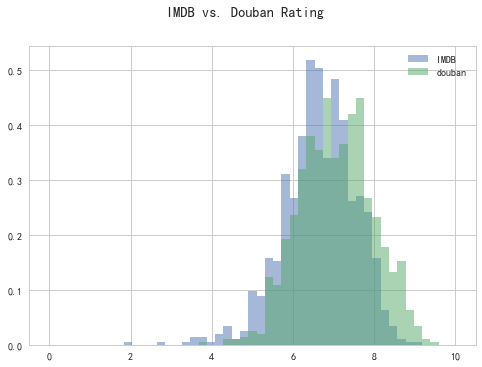

In [23]:
bins=linspace(0,10)
df['imdb_rating'].hist(bins=bins, alpha=0.5, normed=True, label = 'IMDB')
df['db_rating'].hist(bins=bins,alpha=0.5, normed=True, label = 'douban')
plt_configure(title='IMDB vs. Douban Rating', legend=True)

### 4.1.1 Best Movies

In [24]:
# df.sort_values(by='imdb_rating',ascending=False).head()
movie_list(df.sort_values(by='imdb_rating',ascending=False)[:20])

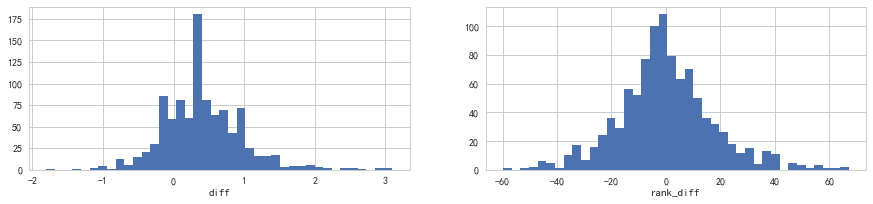

In [25]:
plt.subplot(1,2,1)
df['diff'].hist(bins=40,figsize=(15, 3))
plt.xlabel('diff')
plt.subplot(1,2,2)
df['rank_diff'].hist(bins=40)
plt.xlabel('rank_diff')

## 4.2 Scatter Comparison

### 4.2.1 Rating

 
0.7993 x + 1.009


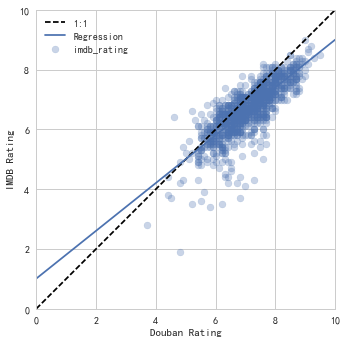

In [26]:
fig, fit_fn, scatter_plot = plot_movie_scatter_comparison(df, title='', type='rating')
print(fit_fn)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare.html')

1. 对比前后scatter plot, 总体趋势是不变的
2. Play with the Scatter Plot， 看看有哪些电影差别很大:

    1. 回归线以上，IMDB >> 豆瓣；回归线以下，豆瓣 >> IMDB
    2. 总体而言，豆瓣评分确实更分散，(7,4.5)附近的一个cluster, 可以算作典型的偏离
    3. 这些偏离的电影，有何规律？

### 4.2.2 Normed Distribution

 
0.8307 x + 0.05221


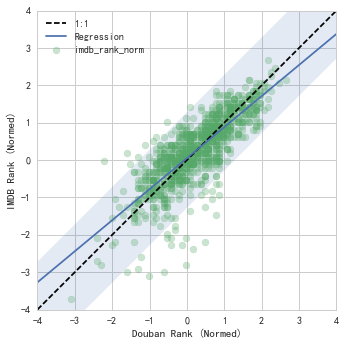

In [27]:
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(df, title='', type='rank_norm')
print(fit_fn)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare_rank_norm.html')

### 4.2.3 Percentile

 
0.8152 x + 9.251


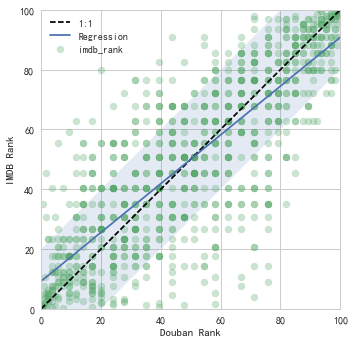

In [28]:
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(df, title='', type='rank')
print(fit_fn)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, df, 'movie_compare_rank.html')

## 4.3 Different Movies

以分位数为差别，是比较客观的看法

In [29]:
movie_list(df.sort_values(by='rank_diff_abs',ascending=False))

我观察到的规律: 似乎很多动画的评分，差别很大，例如：
1. 蓝精灵
2. Rio
3. 冰川时代
4. 疯狂原始人

那么，是不是存在某类电影，评分差别会很大？

接下来，按类别分析

# 5. Genre Comparison

In [31]:
def category_overview2(df, category_name, category, main=False):
    if main:
        mask = df[category_name].apply(lambda x: category in x[0:1])
    else:
        mask = df[category_name].apply(lambda x: category in x[0:2])
    sub_df = df[mask]
#     sub_df = df[df[category_name].str.contains(category)]
    fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(sub_df, legend=False)
    slope = fit_fn[1]
    mean_rank_diff = sub_df['rank_diff'].mean()
    print(category, len(sub_df), fit_fn, mean_rank_diff)
    return len(sub_df), slope, mean_rank_diff

In [32]:
# Documentary ineffective
categories = ['剧情','喜剧',  '动作', '爱情','犯罪', '动画', '科幻', '冒险','悬疑']
slopes = []
mean_deviations = []
for category in categories:
    movie_number, slope, mean_rank_diff = category_overview2(df, 'genre_douban',category)
    slopes.append(slope)
    mean_deviations.append(mean_rank_diff)
    plt_configure(title=category + ' (N: '+str(movie_number) +')')
    plt.gcf().set_size_inches(2.5,2.5)
align_figures()

剧情 468  
0.8053 x + 11.49 0.1461082276792275
喜剧 295  
0.8288 x + 2.287 6.093672657756836
动作 299  
0.7785 x + 14.31 -5.918688343488027
爱情 124  
0.8808 x + 2.544 4.000990806614048
犯罪 102  
0.8074 x + 12.52 -3.440751930177912
动画 55  
0.9943 x - 10.1 10.471482193536579
科幻 78  
0.7658 x + 15.96 -6.407674232447647
冒险 77  
0.833 x + 8.605 -2.4783876747622973
悬疑 64  
0.8507 x + 8.137 -1.4200969284994969


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAL8AAADDCAYAAADTCsC8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmcXUWd9/+uOufc/XbfXpLudKezQdgCIWELIAFlEBVZ
BvdhdMZRfj5uzygzogLiKIz6KAM4o7OoMy4wPOojjqDjgAsKAiJLwpJAErKnO71vd79nq/r9ce69
fW8vSTokIUh/Ql5AnTp16pz7PXW+9anP91tCa62ZwxxehZAvdwfmMIeXC3PGP4dXLeaMfw6vWswZ
/xxetZgz/jm8ajFn/Echtm7dyi9/+cuXuxuzQqlU4tvf/vbL3Y1Z4VVp/A8//DArVqxgzZo1dX9X
rFjBQw89VK03PDzM8ccfTy6Xqzv/lFNOYevWrQDYtk2FLb7mmmv45je/CYDv+ziOM+u+jY2N8bGP
fYz58+cf7O29LAiHw6xfv57vfve7L3dXDhivSuOPxWKsXLmSxx9/vO7vaaedhmVZbN++nY0bN9LQ
0ABAPB6vOz+ZTBKJRAC49NJLefOb38yll17KI488wh133FEtu+6662bdt1tvvZV3v/vdrFq1iscf
f5zjjz+eX/ziF9Xj73nPe/j0pz/9Eu6+HtlslrVr1/L4449POfbtb3+bK6+8Et/3q2WbNm3iyiuv
ZOXKlbz2ta/lrrvuAkAIwS233MIPf/hDenp6Dln/DifMl7sDLwcMwyCXy/HUU0/VlWezWTzP46GH
HqKnp4frr78eCH5YgF27drF3715M0+Sxxx5j27ZtfPSjH2X79u1YlsWvf/1rWltbWbVqFbZt88Y3
vnFW/eru7mbDhg3cdNNNdeV33nknb3jDG17CHc+MW265hcHBwSnle/bs4Wtf+xrf+973MAyjWv7x
j3+cP/uzP+PNb34zGzdu5JprruGkk05i9erVRKNRPvKRj/CNb3yDm2+++bD091DiVWn8AIODg1Uf
9dFHH+W0006jo6ODVCqFlLLuB6/gwQcfZMeOHQAUCgX+9V//lc985jPMnz+faDTKhg0bWLJkCeed
dx62bdPc3IxSCikP7AP7q1/9iksvvXRK/XXr1rFp0yZOPPHEl3jX9Xjqqad44IEHSKVSU47deOON
XH755axcubJaNjo6yq5du3jnO99JNBrlda97HcuWLWPnzp2sXr0agIsvvpjbb78dz/MwzaPbvI7u
3h1GLFu2jH/5l38B4MILL+Rzn/scixcvBmD9+vXTnrN582bWrFnDgw8+yNq1aznppJO49tprMQyj
arC9vb38/ve/R2uN53l88Ytf5PTTTz+gPm3atIl3vvOddWWGYfC6172OO+64gy996UvTnnfhhRfy
sY99jCuuuOKArgPgOA6f/exnueGGG/iHf/iHumN3330369at45JLLuG+++5j7dq1JBIJGhoaaGtr
48477+Q973kPTz75JDt37mTNmjXVc0OhEB0dHfT19dHV1XXA/Xk58Ko0/lwux7Zt23j/+98PBBPb
66+/nnA4zOrVq0kmk9Oet23bNj7wgQ8AwQTvrLPO4qtf/Sr333//lLpCCD7+8Y/Pql+jo6O0tLRM
KX/ve9/L+973Pj7xiU9Me95Pf/pTwuHwrK71jW98g8WLF3PJJZfUGX+hUOC2226js7OTvr4+Hnro
IW655RbuuusuFixYwJe//GXe9773ceuttwJw880309nZWdf2vHnzGBkZmTP+oxHDw8OccsopVeP8
0Ic+xF/91V8xf/584vE4Dz/88LTn3X333VPKtm/fzhNPPFFn6IVCgf/9v//3rI0/FotRKBSmlJ95
5pksX76cH/zgB9Oel0gkZnWd7du38/3vf5+f/OQnU4798pe/JJPJ8JOf/IS2tjYA3v/+9/Otb32L
a6+9lhtvvJEvfOELXHzxxTz77LNce+21LFq0iLPPPrvaRj6fn0ISHI14VRr/rl27WL58+RRjE0Iw
b948AA5U7BoOh9myZUvdBE8phWVZs+5XR0cHu3fvZsWKFVOO/eVf/iW33HILCxcunHW7tdBac+ON
N/Lxj3+8aty16O/v54QTTqg7dvLJJ7Nx40Yee+wxGhoaeMtb3gLAa17zGi699FLuueeeOuPv7u6m
vb39JfXzSOBVafzr1q3j8ssv54YbbsB1XY4//ni+//3vs2HDBm655RZKpRK2bR9QW0IIzj777Or8
ASCTyXDBBRfMul/nn38+//Vf/8Ull1wy5VjFPXnuuedYsmTJrNuuoLe3l3Xr1vHiiy/yla98BQjc
wA9+8INcccUVrFq1ilKpVHdOT08P8+fPx/d9RkZG6o4NDw/XkQPbtm2jubl5RtfxaMKrzvj7+vp4
+umnufnmm/npT3/KX//1X3PuuecCAYduWRYf/OAHAfA874Da/MMf/sCll15a/X+l1EH1bc2aNXz5
y19m69atLF++vO6YZVn8+Z//ObfffvuU83K5HOFw+IC+Nm1tbTzwwAN1ZVdddRWf+tSnOOeccxBC
8Pd///f8+7//O5dddhlPPPEEv/jFL/jWt75FV1cXw8PD3HTTTZxxxhm88MIL3HfffXV9+trXvsZV
V111UPd/pPGqM/4HH3yQpUuXVkfPz3zmM8RiMSAY4SruzsDAAN3d3dO2Ydt2deFHKTVl5C+VSpxz
zjmz7ptpmtxwww18+tOf5s4775xy/J3vfCf/9m//NqX88ssvP2C2xzTNKa6TaZq0trbS3NwMwH/8
x3/wla98ha9//eskk0muu+666v18/etf5x//8R/58Y9/TCwW42Mf+1h1PeOnP/0p6XR62i/XUQn9
KoPv+/rxxx/XWmv99re/XT/66KPVYzfddJNet26d1lrr733ve/q4447Tb3/726e0cfbZZ+tt27Zp
rbW+99579Yc+9KG64x/84Af13/7t3x50H7/zne/ob3zjGwd9/suBfD6v3/72t+uRkZGXuysHDKH1
XBjjdCiVSuTz+WmpxyOB2SyOHS14pfV5zvjn8KrFK+c1ncMcDjEOi/EPDw/Xzfivv/563vWud9VN
Cqcrm8McjiQOufGn02k+9alPUSwWgWDFUCnFD37wAwYHB9m1a9e0ZXOYw5HGITd+wzD46le/Wl1y
f+KJJ3jTm94EwNlnn826deumLZvDHI40DjnPP1lnUigUqkvliUSCPXv2TFu2L8y9HHPYHw5UOVuL
w77IFYvFqsvlhUIBpdS0ZfvDwdzcoca6deteVf3YMbqH4cIoUkw4CEorWqJNCCF4fMOTLF66BFMa
tESb0Gj2jAxScFwkkr58P45v42sfU5q0x9s5vW31tHSo1prubDdP9q5j29gOCn4BT3l4voevPXwU
EomBQckpsv7bD3PCFatJLkjxqWOvPqj7O+xsz8knn1wduTdv3kxnZ+e0ZXM4uqCUmmL4AFJIXhjc
ymB+GCkEIcNCCsnzg1tY170J1wfLsNiR3klvtpe8lydshjGkQX9+gHUDT1fb8pRH1snhKY+e7F6G
CiNIYZD38jiujVIKT09ITBQK2ynx+9t+wa4Ht7D53qd5KTjsI/9FF13EVVddxeDgIL/73e/4f//v
/yGEmFI2h6MLjnLxlE/IqDd+rTVjpTQt8aZqmdI+w9kMrq9pDDWhtWa8NIZhSEqeTUNII4TAkJL+
fD+O5/Ds0Ab68/14ysMQBq7v0RRJMVQYouSWcHFh0gqU73j8/rZf0P9MN+2rujjtfWtf0j0etpG/
ok1JJBLceeednHrqqdxxxx0kk8lpy+ZwdCEkLUw5NZTTU8FIPHFMk86VsH0fhcJTPrbv4OtA+6S1
RmlVd/7jfU/Snx/AkAZhM4wQgt5cL9vHd+BpPzD8SZhs+Of+zRswQi9t7D4iwrbGxsYpYqfpyuZw
9EBKSWusmeH

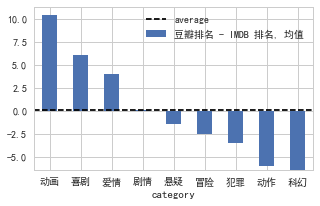

In [33]:
temp_df = pd.DataFrame({'category': categories, 'slope': slopes, 'mean_deviation': mean_deviations})
avg = np.average(mean_deviations)
temp_df.sort_values(by='mean_deviation',ascending=False).plot(x='category', y='mean_deviation', kind='bar', rot=0, label='豆瓣排名 - IMDB 排名, 均值')
plt.gca().axhline(avg, linestyle='--', color='black', label='average')
plt_configure(legend=True, figsize=(5,3))

可以发现，动画和其他类别，显著不同。具体画如下

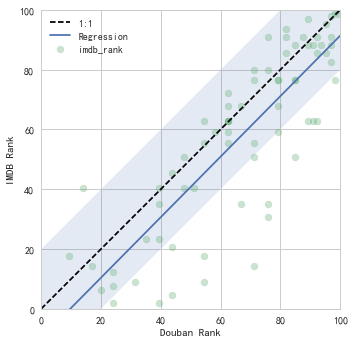

In [34]:
# sub_df = df[df['genre'].str.contains('Animation')]
sub_df = df[df['genre_douban'].apply(lambda x: '动画' in x)]
fig, _ , scatter_plot = plot_movie_scatter_comparison(sub_df)
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'animation_movies.html')

# 6. Country Comparison

In [35]:
slopes, mean_deviations = [], []
# Korea, India, Itlay is ineffecetive
countries = ['美国', '英国', '法国', '德国',"中国大陆","日本"]
for category in countries:
    try:
        movie_number, slope, mean_deviation = category_overview2(df, 'country_douban', category, main=True)
        slopes.append(slope)
        mean_deviations.append(mean_deviation)
        plt_configure(title=category + ' (N: '+str(movie_number) +')')
        plt.gcf().set_size_inches(2.5,2.5)
    except:
        print(category + 'not enough data')
align_figures()

美国 742  
0.8165 x + 8.224 0.4421109491507944
英国 91  
0.7473 x + 15.43 -1.1747064617155256
法国 45  
0.8582 x + 4.182 5.171757860579614
德国 13 Not available 2.033465024401581
中国大陆 13 Not available -12.460299016190255
日本 13 Not available -3.3271361065922993


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAL8AAADDCAYAAADTCsC8AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzsvXmYXVWZ7/9Za+999hlrrqTGTJAwBCQDgyigBBrihG1L
a7fya9HH1mt327a2A+K1pb1eubQNeu37aNt2i4o4tDggqICCQiMKIQQIECCQqZKqSk2nTp1xD2ut
3x/7nJOqVCWpKhKGpr558iRnnbX3Wnvv96z9ru87CWOMYQELeBlCvtATWMACXigsCP8CXrZYEP4F
vGyxIPwLeNliQfgX8LLFy174v/71r7Nnz576Z601V1xxBX19fS/YnLZv384dd9zxgo0/H1QqFb7x
jW+80NOYE+wXegIvNNLpNB//+Mf5/ve/D8Att9zCs88+y+LFi6f1ffDBB7n88stZtmzZEc+7Z88e
vvzlL/Pa1752TvPJZrN86EMf4vOf//ycjnuh4bouDz30EFJKLr/88hd6OrODeRlidHTUnH/++Wbj
xo3mDW94gzn33HPNG97wBvOGN7zBrF27tv75da97nfmP//iP+nFbtmwx559//qzGuOSSS8zvfve7
Oc/tU5/6lLnxxhuNMcb84Q9/MKtWrTK33XZb/fvLLrvMfOITn5jzeSfjE5/4hFm1atW0vz/60Y+m
9f3Lv/xL8+Uvf7n++dlnnzVvf/vbzerVq81ZZ51lvvOd79S/K5VKZuPGjaavr+85ze/5wsty5W9u
buaWW24hHo9jWRYA9913H1/96le59dZb6/3CMERrXf9s2wdu1znnnIMxBsdxKJVKpNNplFJMTExw
1113ASDl3LTKvr4+tm7dymc/+9kp7TfccAMXX3zxnK/zUPjMZz7DlVdeWf+czWa59NJLOeOMM6b0
+/nPf87dd9/NqaeeCkQq4V//9V/zmte8hn/5l39h8+bNfOQjH+HMM89k5cqVJBIJ/vqv/5qvfe1r
/K//9b+O2nyPFV6WOr8Qgng8jlLqkH201miticVi9bbaDwXg3nvv5Xe/+x3f+ta3SKfT3HXXXdx9
991s2bKF5ubm+jhzwa9+9Sve+MY3TvvRbN68mW3bts3pXIdDIpGgoaGh/ve73/0ub37zm+nt7a33
yeVyXH311Sxfvrzetm/fPl71qldxxRVX0N7ezsaNG+nt7eXxxx+v97nooou47777CMPwqM33WOFl
ufIDbNq0iWuuuQbXdRFCUCgU6O/v58///M8BUErR29vLtdde+7zNadu2bbz97W+f0mZZFueffz7f
/va3ufrqq2c8bsOGDXzoQx/izW9+85zHHBkZ4Uc/+hG33XbblPZrrrmGCy64AM/z6m29vb18+tOf
rn+u3bPJe6BYLEZXVxcDAwNTfkwvRrwshd/zPM4880x+8pOf1Ntqas8NN9xQbzPGUKlUcBxnyqoP
8IEPfIBHHnkE27YZGRlhw4YNeJ7HkiVL+N73vjeveY2NjdHa2jqt/fLLL+c973kPH/3oR2c87mc/
+xmu685rzO9+97tceOGFtLW11dvuv/9+7rvvPm699VY+97nPHfLYf//3f2flypWcdtppU9rb29sZ
HR1dEP4XIz74wQ8yMDAwo04+efU0xhCGIVdfffW0B/zVr34VgN27d/Pud7+bH/7wh3z729/mr/7q
r+Y9r2QySalUmtZ+xhlnsHLlyjojdTDS6fS8xgvDkB/84Ad87Wtfq7d5nsc//MM/cNVVVx32vI8/
/jjXX389119//TT1rlgskkql5jWn5xMvS+H/yle+gtYa27brP4BvfvObbNu2jWuuuabeT2tNGIZT
9P5Dobm5Gd/32b59O6eccsq85tXV1cXu3btZvXr1tO/e9a538YUvfIGenp55nXsm3HvvvaTT6Snz
/cpXvsIpp5xyWIp2YmKCD3/4w3zgAx9g3bp1077v6+ujo6PjqM3zWOFlKfx33nkn//zP/4xt23V1
pq+vj0qlwpYtW+rCrpRi0aJFfOtb35py/L333svf/d3f1VfGUqnEhRdeiDGGn/zkJ3zmM5+Z17zO
O+88fvzjH/P6179+2nevf/3r+ed//mceffTRWdkZZoNbb72VjRs3Tmm75ZZbyGaznH766UBkvBJC
cMcdd3DLLbcQBAEf/vCHWbVqFe9///unnfOZZ56hpaWFTCZzVOZ4TPHCMq0vDjzyyCPm3HPPNf/0
T/9k3vOe95h8Pj9jv0cffXROPP999903p3kEQWDe9KY3maefftoYE/H8J510Uv37r371q2bVqlXT
eP58Pm9835/TWEopc+aZZ06b48DAgOnr66v//eAHP2g+97nPmYGBAWNMZIfYuHGjGR4eNoVCwRQK
BeN5Xv34v/3bvzU///nP5zSXFwovS6qzBt/3+d73vsff/M3fcN111/Gxj32M9evXc8kll3DzzTdP
YTqAOdN3QRDMqb9t23zqU5/iiiuumFH3f/vb304ikZjWfskll/CLX/xiTmNt27aNQqHAmjVrprR3
dHTQ09NT/5tMJmloaKCjo4OJiQluuukmduzYwatf/WrWrVvHunXr6nuGn/3sZ+RyuRnfXC9GCGNe
fpFct912G7fddhubNm1i/fr1fPSjH2XJkiX17x988EE+//nPs2vXLtauXct73/tezj77bDZt2sS7
3/3uWbs3fOlLX2LDhg1znt83v/lNfN/nfe9735yPfaFQKpW4/PLL+dd//VdaWlpe6OnMCi9L4X/0
0Ud54IEHuOiii6YI/Uz97rnnHt71rneRyWRQSuH7/oyr79GG1nrOFuIXGi+1Ob8shX8BC4CXqXvD
AhYAx0j4R0ZGeMc73lH/fOWVV/Jnf/ZnfOUrXzls2wIW8HziqAt/LpfjE5/4BOVyGYA77rgDrTXf
//73GRoaYteuXTO2LWABzzeOuvBblsWXvvSlugHogQce4HWvex0Ar3zlK9m8efOMbQtYwPONo27h
PdgfpFQq1aOi0uk0e/bsmbHtcFj4cSzgSFi/fv2cjznm7g3JZJJKpQJEPwSt9YxtR8J8Lu5oY/Pm
zS+reewY28NIaQwpDigI2mhaE80IIbh/6yaWLl+GLS3aki0sa+phvOBT9qIgoM37tzBYHCTUIUW/
hDKKlkQzBpBCkrATZJw0cTuOMgqJpL/Qz+5cHyVVohJW8JVPoAI8FRkcLWFR9ko89I3/4sQ3ryXT
2cQnjn/vvK7vmLM9p5xySn3lfvLJJ+nu7p6xbQEvLmitpwk+REL7xNB2hoojSCGIWQ5SSEZKozyy
71nKXmQFjwR/P1JIpLTIeTmy5Sz7i0PY0kIKwUC+n63Dj6NMiGM5aDSloMxoZZRyUEYAoQ7RRqNQ
GAyB53Pfdbez67dP8eTNW57TNR7zlf/CCy/kHe94B0NDQ9xzzz3853/+J0KIaW0LeHHB1wGhVsSs
qcJvjCFbydGaap7cSqmsKPujtLmL0UYzUBigFJYoBx6hDhj3csQsh4JfIAgDdk/sYaQ8ijaKcS9L
W6KdnkwXWS9LKSgBBoTAD30MkSkq8H1+f90dDD7cR8eaXta959zndI3HTPhrQSHpdJobbriB3/3u
d7z3ve+te/vN1LaAFw9i0sGW1rT2UEcr+4HvDIVSgBdqlFEEOsRXPuOVHAqNlCCxqscqlNHsGN9F
MSgiBFjYSGExWBgk543THG/CEhagCbRCozEYlB9y33W31wX/VR+5GCv23MT3eXFpbmxsnObsNFPb
Al48kFLSlmyZpvpIIWmKNyCFRGtDNl8i1AIpJJawsKp9fe3jWDah0oQ6wBISAwRhQECAZVmYAKQE
ozTKhEz4eXoy3QghcK0EMaNRvsIWNjm/QjlbomPNEl79kYuRMQuJxH4OIvyy9OdfwOywvDkKQxwp
jRFqhS0t2lO

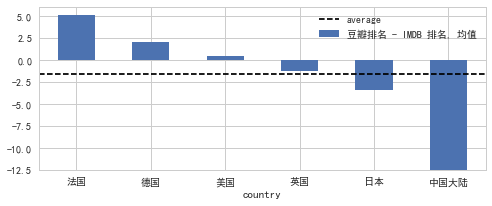

In [36]:
temp_df = pd.DataFrame({'country': countries, 'slope': slopes, 'mean_deviation': mean_deviations})
avg = np.average(mean_deviations)
temp_df.sort_values(by='mean_deviation',ascending=False).plot(x='country', y='mean_deviation', kind='bar', rot=0, label='豆瓣排名 - IMDB 排名, 均值')
plt.gca().axhline(avg, linestyle='--', color='black', label='average')
plt_configure(legend=True,figsize=(8,3))

17 o


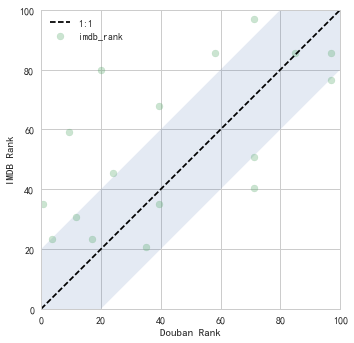

In [37]:
country='中国'
sub_df = df[df['country_douban'].apply(lambda x: any(country in x[0] for country in ['香港', '中国大陆','台湾']))]
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(sub_df)
print(len(sub_df), fit_fn[1])
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'china_movies.html')

In [39]:
movie_list(sub_df.sort_values(by='rank_diff_abs',ascending=False))

20 0.586504282124


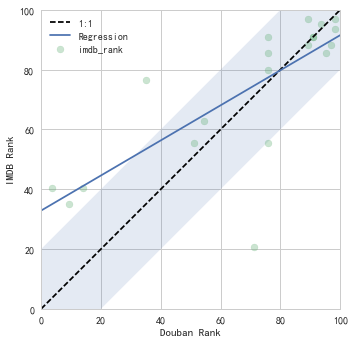

In [40]:
country='亚洲'
sub_df = df[df['country_douban'].apply(lambda x: any(country in x[0:1] for country in ['日本', '韩国','印度']))]
fig, fit_fn , scatter_plot = plot_movie_scatter_comparison(sub_df)
print(len(sub_df), fit_fn[1])
plt.show()
turn_scatter_into_interactive(fig, scatter_plot, sub_df, 'asia_movies.html')

In [42]:
# movie_list(sub_df.sort_values(by='rank_diff_abs',ascending=False))

整体而言，其实评价有好有坏。
- 大部分略微偏低，但总体一致。可以认为是文化差异，东方文化魅力在国外会有加成
- 好的电影，像叶问一致评价都是较高的。
- 另外也存在一些文化差异，导致评分有明显差别的，比如让子弹飞、一代宗师